In [ ]:
#import all libraries
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import *
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import *
from itertools import cycle

In [ ]:
#get working directory
import os
os.getcwd()

In [43]:
#read the data
X=pd.read_excel(r"Downloads\Radar_Dataset_397880.xlsx")
X

,TIMESTAMP,LONG_DIST,REL_SPEED,NEW_TRACK,LAT_DIST
0,1534877923611,3.3750,-0.65625,0,-0.5000
1,1534877928013,78.0625,0.75000,1,3.7500
2,1534877928064,78.1250,0.90625,0,3.5000
3,1534877928113,78.1250,1.18750,0,3.5000
4,1534877928164,78.2500,0.65625,0,3.3125
5,1534877928214,78.2500,0.87500,0,2.8750
6,1534877928263,78.3125,0.62500,0,2.7500
7,1534877928264,12.6250,0.68750,1,1.3125
8,1534877928313,78.3125,0.59375,0,2.5625
9,1534877928313,12.6250,0.71875,0,1.3125


In [44]:
#dropped NAs and reset index
X1=X.dropna()
X2= X1.reset_index(drop=True)
X2

,TIMESTAMP,LONG_DIST,REL_SPEED,NEW_TRACK,LAT_DIST
0,1534877923611,3.3750,-0.65625,0,-0.5000
1,1534877928013,78.0625,0.75000,1,3.7500
2,1534877928064,78.1250,0.90625,0,3.5000
3,1534877928113,78.1250,1.18750,0,3.5000
4,1534877928164,78.2500,0.65625,0,3.3125
5,1534877928214,78.2500,0.87500,0,2.8750
6,1534877928263,78.3125,0.62500,0,2.7500
7,1534877928264,12.6250,0.68750,1,1.3125
8,1534877928313,78.3125,0.59375,0,2.5625
9,1534877928313,12.6250,0.71875,0,1.3125


In [45]:
#Extracting timestamp column for clustering 
X3= X2.drop(['REL_SPEED',"NEW_TRACK","LAT_DIST"], 1)
X3.reset_index(drop=True)


,TIMESTAMP,LONG_DIST
0,1534877923611,3.3750
1,1534877928013,78.0625
2,1534877928064,78.1250
3,1534877928113,78.1250
4,1534877928164,78.2500
5,1534877928214,78.2500
6,1534877928263,78.3125
7,1534877928264,12.6250
8,1534877928313,78.3125
9,1534877928313,12.6250


In [46]:
#Checking the length of extracted tiestamd data in X3
len(X3)

129021

In [ ]:
#http://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py

In [47]:
#reshaping the sequence into 2D array because of the syntax requirements
#X4=np.reshape(X3, (-1, 2))
#X4
X4=X3.reset_index().values

X5= np.delete(X4, 0, 1) 
X5

array([[1.53487792e+12, 3.37500000e+00],
       [1.53487793e+12, 7.80625000e+01],
       [1.53487793e+12, 7.81250000e+01],
       ...,
       [1.53487902e+12, 9.50000000e+00],
       [1.53487902e+12, 1.21250000e+01],
       [1.53487902e+12, 9.50000000e+00]])

In [49]:
len(X5)

129021

In [50]:
#Estimating bandwidth
#note: this bandwidth is calculated considering all data ppoints as centroids atleast once and then narrowed
#down to the resultant band
bandwidth = estimate_bandwidth(X5, n_jobs=5)
bandwidth

179756.26495918908

In [51]:
#fitting the data into clustering model based on the calculated bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X5)



MeanShift(bandwidth=179756.26495918908, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [52]:
#Finding out Cluster centers
labels = ms.labels_
cluster_centers = ms.cluster_centers_
cluster_centers


array([[1.53487841e+12, 7.47852809e+01],
       [1.53487870e+12, 5.33079935e+01],
       [1.53487813e+12, 7.72685165e+01]])

In [53]:
#Getting number of clusters
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 3


In [ ]:
labels_unique

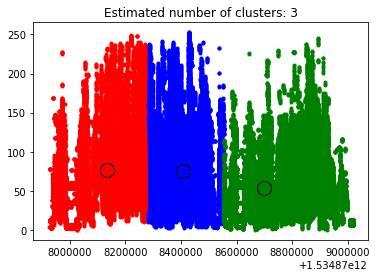

In [54]:
#Plot the results
plt.figure(1)
plt.clf()
 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X5[my_members, 0], X5[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1],
             'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()